In [2]:
import numpy as np
import pandas as pd
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

from sklearn.datasets import make_classification


In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Сгенерируем синтетические данные.
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

Обучим метод опорных векторов. 
Подберем параметр регуляризации $C$, оптимальный с точки зрения AUC-PR

In [5]:
def auc_pr(y_test, y_pred):
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    return auc(recall, precision)

In [6]:
scl = StandardScaler()
X = scl.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
def c_best_selection(C_set, clf, X_t, y_t, X_val, y_val):
    auc_p_r = 0
    C = 1.0
    
    for C_i in C_set:
        clf.C = C_i
        
        clf.fit(X_t, y_t)
        a_x = clf.predict(X_val)
        precision, recall, th = precision_recall_curve(y_val, a_x)
        
        auc_precision_recall = auc(recall, precision)
        
        if auc_precision_recall > auc_p_r:
            auc_p_r = auc_precision_recall
            C = C_i
            
    print('Подобранный параметр C = ', C)
    return C

In [9]:
best_c_linearSVC = c_best_selection(np.arange(0.001, 100, 1), LinearSVC(), X_train1, y_train1, X_val, y_val) 

Подобранный параметр C =  51.00099999999999


На тестовой части построим ROC и PR кривые, а также посчитаем AUC-ROC, AUC-PR.

In [10]:
clf = LinearSVC()
clf.C = best_c_linearSVC
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

In [11]:
precision, recall, th = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

In [12]:
print('AUC_ROC: %0.5f' %auc(fpr, tpr))
print('AUC_PR: %0.5f' %auc(recall, precision))

AUC_ROC: 0.75279
AUC_PR: 0.81750


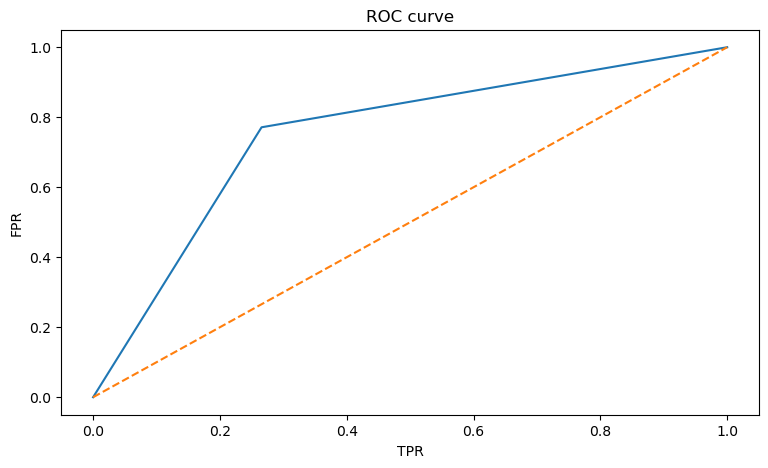

In [13]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], linestyle = '--')

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC curve')
plt.show()

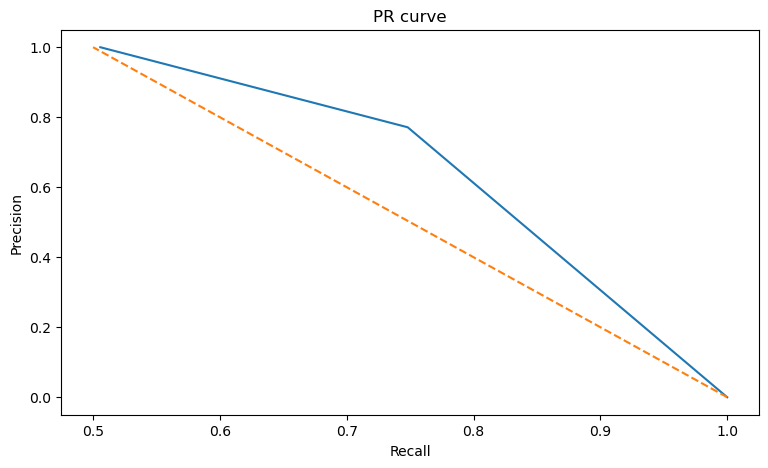

In [14]:
plt.figure(figsize=(9,5))

plt.plot(precision, recall,label='PR')
plt.plot([1,0.5],[0,1], linestyle = '--')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

Проделаем все то же самое для логистической регрессии.


In [15]:
best_c_LR = c_best_selection(np.arange(0.001, 100, 1), LogisticRegression(), X_train1, y_train1, X_val, y_val)

Подобранный параметр C =  1.001


In [16]:
clf = LogisticRegression()
clf.C = best_c_LR
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

precision, recall, th = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

print('AUC_ROC: %0.5f' %auc(fpr, tpr))
print('AUC_PR: %0.5f' %auc(recall, precision))

AUC_ROC: 0.77134
AUC_PR: 0.83116


In [17]:
AUC_ROC: 0.75377
AUC_PR: 0.81824

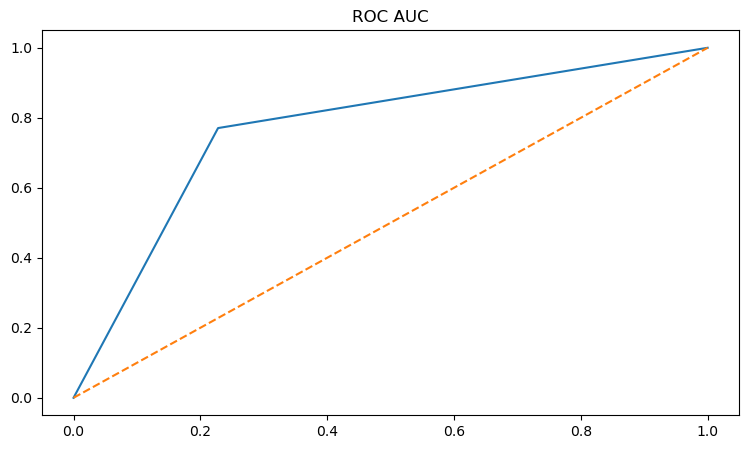

In [18]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle='--')
plt.title("ROC AUC")
plt.show()

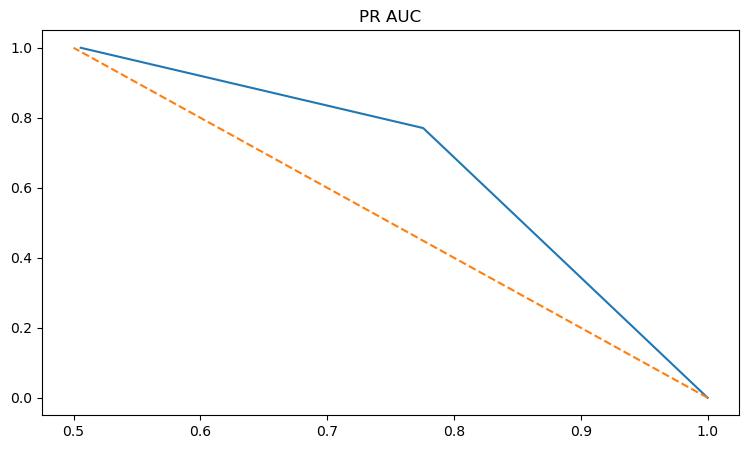

In [19]:
plt.figure(figsize=(9,5))

plt.plot(precision, recall, label="PR")
plt.plot([1, 0.5],[0,1], linestyle='--')
plt.title("PR AUC")

plt.show()